## Iris Flower Classification using KNN algorithm

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load the Dataset

In [1]:
from sklearn.datasets import load_iris
X,Y = load_iris(return_X_y=True)

In [3]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
Y[:5]

array([0, 0, 0, 0, 0])

## Data Preprocessing

Scaling the data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_pre = scaler.fit_transform(X)
X_pre[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## Perform train test split on the dataset

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=0.8,random_state=21)

In [8]:
xtrain.shape

(120, 4)

In [9]:
xtest.shape

(30, 4)

In [10]:
ytrain.shape

(120,)

In [12]:
ytest.shape

(30,)

## Build the KNN model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

## Model Evaluation

In [15]:
knn.score(xtrain,ytrain)

0.9833333333333333

In [16]:
knn.score(xtest,ytest)

0.9666666666666667

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,xtrain,ytrain,cv=5,scoring='accuracy')
scores

array([1.        , 0.95833333, 1.        , 1.        , 1.        ])

In [18]:
import numpy as np
score = np.mean(scores)
score

0.9916666666666668

Testing accuracy score is around 96% and cross validated score is around 99%. This is a good model, we can proceed with model predictions

## Plotting Confusion matrix and Classification report

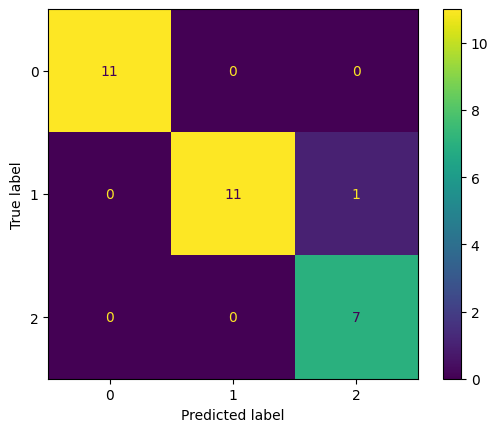

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cf = confusion_matrix(ytest,ypred_test)
ConfusionMatrixDisplay(cf).plot()

In [22]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



We can observe the good score of TP and TN values from confusion martix. We can also observe that the f1-score average is 0.97. 
Let's consider this model for final predictions

## Model Prediction

In [19]:
ypred_test = knn.predict(xtest)
ypred_test[:5]

array([1, 0, 0, 0, 1])

In [20]:
ytest[:5]

array([1, 0, 0, 0, 1])